<a href="https://colab.research.google.com/github/Tdavies92/AcademyPublic/blob/main/FPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/vaastav/Fantasy-Premier-League.git

fatal: destination path 'Fantasy-Premier-League' already exists and is not an empty directory.


In [6]:
import pandas as pd
data = pd.read_csv('https://fantasy.premierleague.com/api/bootstrap-static/',index_col=True)

ValueError: ignored

In [5]:
data

,"{""events"":[{""id"":1","name:""Gameweek 1""","deadline_time:""2021-08-13T17:30:00Z""",average_entry_score:69,finished:true,data_checked:true,highest_scoring_entry:5059647,deadline_time_epoch:1628875800,deadline_time_game_offset:0,highest_score:150,is_previous:false,is_current:false,is_next:false,"chip_plays:[{""chip_name"":""bboost""",num_played:145658},"{""chip_name"":""3xc""",num_played:225749}],most_selected:275,most_transferred_in:1,top_element:277,"top_element_info:{""id"":277",points:20},transfers_made:0,most_captained:233,most_vice_captained:277},"{""id"":2","name:""Gameweek 2""","deadline_time:""2021-08-21T10:00:00Z""",average_entry_score:56,finished:true.1,data_checked:true.1,highest_scoring_entry:6882931,deadline_time_epoch:1629540000,deadline_time_game_offset:0.1,highest_score:146,is_previous:false.1,is_current:false.1,is_next:false.1,"chip_plays:[{""chip_name"":""bboost"".1",num_played:95038},...,"singular_name_short:""GKP""",squad_select:2,squad_min_play:1,squad_max_play:1,ui_shirt_specific:true,sub_positions_locked:[12],element_count:72},"{""id"":2.2","plural_name:""Defenders""","plural_name_short:""DEF""","singular_name:""Defender""","singular_name_short:""DEF""",squad_select:5,squad_min_play:3,squad_max_play:5,ui_shirt_specific:false,sub_positions_locked:[],element_count:211},"{""id"":3.2","plural_name:""Midfielders""","plural_name_short:""MID""","singular_name:""Midfielder""","singular_name_short:""MID""",squad_select:5.1,squad_min_play:2,squad_max_play:5.1,ui_shirt_specific:false.1,sub_positions_locked:[].1,element_count:255},"{""id"":4.2","plural_name:""Forwards""","plural_name_short:""FWD""","singular_name:""Forward""","singular_name_short:""FWD""",squad_select:3,squad_min_play:1.1,squad_max_play:3,ui_shirt_specific:false.2,sub_positions_locked:[].2,element_count:86}]}


In [ ]:
!ls

Fantasy-Premier-League	sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
import seaborn as sns
import itertools
import scipy.stats as ss
from imblearn.over_sampling import SMOTE

In [ ]:
df= pd.read_csv('Fantasy-Premier-League/data/2021-22/players_raw.csv')

In [ ]:
df.head

<bound method NDFrame.head of      assists  bonus  bps  ... value_season    web_name  yellow_cards
0          0      0   48  ...          0.9        Leno             0
1          0      0    0  ...          0.0   Rúnarsson             0
2          0      0    0  ...          0.0     Willian             0
3          1      7  139  ...          3.9  Aubameyang             1
4          0      0   21  ...          0.2      Cédric             1
..       ...    ...  ...  ...          ...         ...           ...
618        0      0    0  ...          0.0    Campbell             0
619        0      0    0  ...          0.0     Marques             0
620        0      8  134  ...          6.2       Hwang             0
621        0      0    0  ...          0.0     Moulden             0
622        0      0    0  ...          0.0      Storer             0

[623 rows x 67 columns]>

In [ ]:
# The random split is used with the sklean library, I decided to have 75% in train and 25% in test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25, random_state=893717398)

In [ ]:
# Let's see if we have duplicated rows:
#feature_analyze_duplicates = ['form', 'ict_index', 'influence', 'minutes',
#       'points_per_game', 'selected_by_percent', 'team',
#       'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'assists','event_points']
#feature_analyze_duplicates

In [ ]:
#len(train[train.duplicated(subset = feature_analyze_duplicates, keep=False)])
# We see that we have 104 rows that are duplicated, we can decide to keep the first or last.
# Let's create a function that will automatize this process

In [ ]:
#def drop_duplicate_keep_first(database, list_of_features):
#  database = database.drop_duplicates(subset= list_of_features, keep='first')
#  return database

In [ ]:
#train = drop_duplicate_keep_first(train, feature_analyze_duplicates)

In [ ]:
# Let's see the features distributions in order to see if we have strange / extrem values
continuous_feature_analyze_distribution = ['form', 'ict_index', 'influence', 'minutes',
       'points_per_game', 'selected_by_percent', 'team',
       'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'assists','event_points']

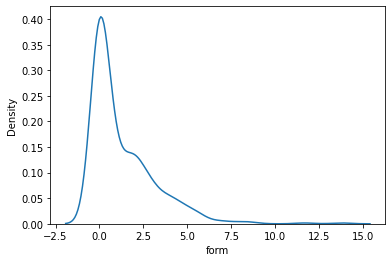

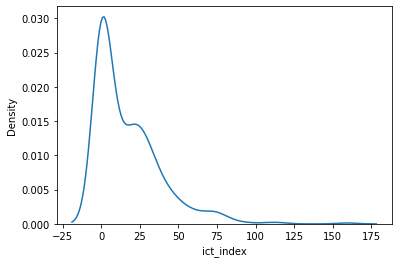

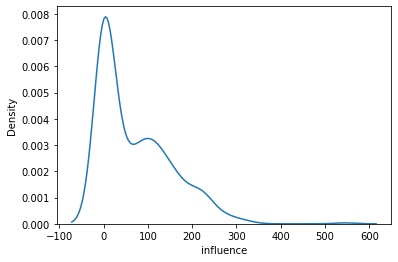

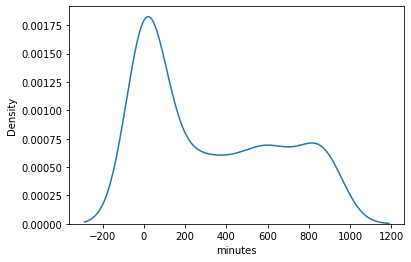

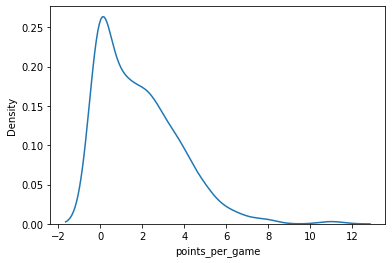

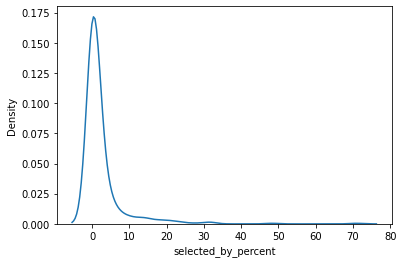

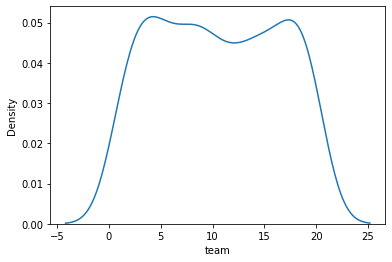

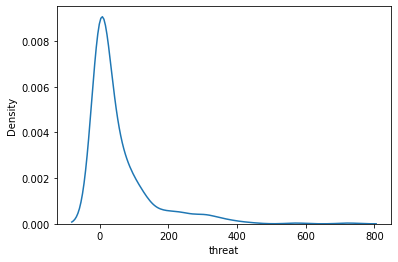

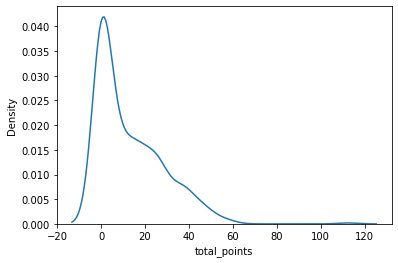

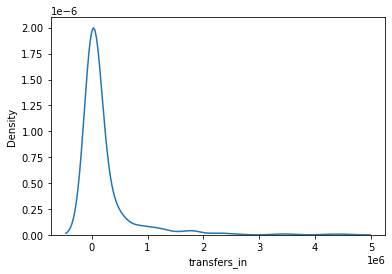

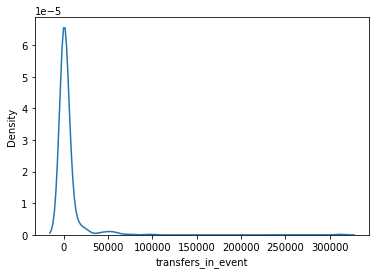

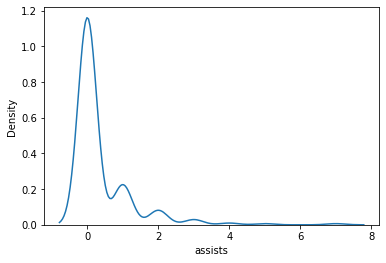

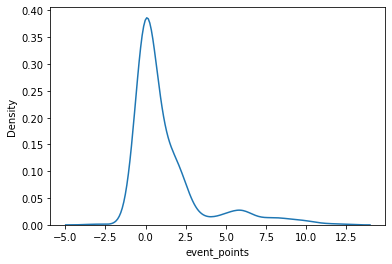

In [ ]:
for i, col in enumerate(train[continuous_feature_analyze_distribution]):
  plt.figure(i)
  sns.kdeplot(x=col, data=train)

In [ ]:
train.isna().sum()

assists                         0
bonus                           0
bps                             0
chance_of_playing_next_round    0
chance_of_playing_this_round    0
                               ..
transfers_out_event             0
value_form                      0
value_season                    0
web_name                        0
yellow_cards                    0
Length: 67, dtype: int64

In [ ]:
feature_analyze_correlation = ['form', 'ict_index', 'influence', 'minutes',
       'points_per_game', 'selected_by_percent', 'team',
       'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'assists','event_points']

In [ ]:
# Get all the correlations:
corr = train[feature_analyze_correlation].corr()

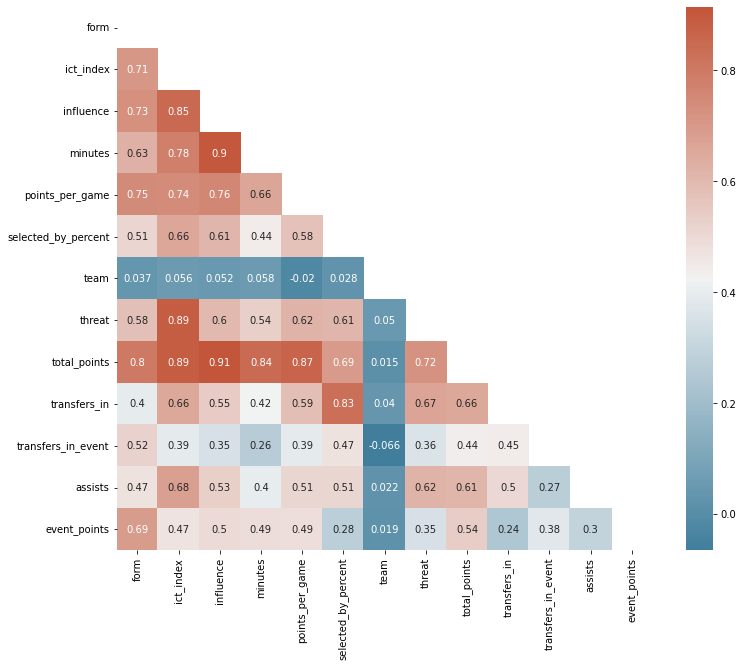

In [ ]:
# Set up the matplotlib plot configuration
fig, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
X_features = ['form', 'ict_index', 'influence', 'minutes',
       'points_per_game', 'selected_by_percent', 'team',
       'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'assists']

In [ ]:
Y_feature = ['event_points']

In [ ]:
response = 'event_points'
y = df[[response]]
y.head()

,event_points
0,0
1,0
2,0
3,2
4,0


In [ ]:
predictors = list(df.columns)
predictors

['assists',
 'bonus',
 'bps',
 'chance_of_playing_next_round',
 'chance_of_playing_this_round',
 'clean_sheets',
 'code',
 'corners_and_indirect_freekicks_order',
 'corners_and_indirect_freekicks_text',
 'cost_change_event',
 'cost_change_event_fall',
 'cost_change_start',
 'cost_change_start_fall',
 'creativity',
 'creativity_rank',
 'creativity_rank_type',
 'direct_freekicks_order',
 'direct_freekicks_text',
 'dreamteam_count',
 'element_type',
 'ep_next',
 'ep_this',
 'event_points',
 'first_name',
 'form',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'ict_index_rank',
 'ict_index_rank_type',
 'id',
 'in_dreamteam',
 'influence',
 'influence_rank',
 'influence_rank_type',
 'minutes',
 'news',
 'news_added',
 'now_cost',
 'own_goals',
 'penalties_missed',
 'penalties_order',
 'penalties_saved',
 'penalties_text',
 'photo',
 'points_per_game',
 'red_cards',
 'saves',
 'second_name',
 'selected_by_percent',
 'special',
 'squad_number',
 'status',
 'team',
 'team_code',
 'threat',

In [ ]:
predictors = df[['form', 'ict_index', 'influence', 'minutes',
       'points_per_game', 'selected_by_percent', 'team',
       'threat', 'total_points', 'transfers_in', 'transfers_in_event', 'assists']]
x = predictors
x.head()

,form,ict_index,influence,minutes,points_per_game,selected_by_percent,team,threat,total_points,transfers_in,transfers_in_event,assists
0,0.0,7.9,79.0,270,1.3,1.1,1,0.0,4,57372,505,0
1,0.0,0.0,0.0,0,0.0,0.8,1,0.0,0,19017,0,0
2,0.0,0.0,0.0,0,0.0,0.1,1,0.0,0,914,0,0
3,5.7,71.8,198.6,698,4.3,5.2,1,408.0,39,534492,40707,1
4,0.0,6.8,30.8,188,0.3,0.2,1,1.0,1,10654,158,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1233)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [ ]:
model.intercept_

array([0.22146134])

In [ ]:
model.coef_

array([[ 1.00428479e+00, -3.00478870e-02, -8.12609385e-04,
         2.38699341e-03, -1.91902008e-01, -1.59064890e-01,
        -2.01202047e-02,  1.89126646e-03,  5.75951234e-03,
         1.13639955e-06,  2.31094632e-05,  1.04031165e-01]])

In [ ]:
model.score(x_test, y_test)

0.38203637197112533

In [ ]:
y_pred = model.predict(x)

In [ ]:
df.second_name

0                 Leno
1            Rúnarsson
2      Borges Da Silva
3           Aubameyang
4               Soares
            ...       
618           Campbell
619            Marques
620              Hwang
621            Moulden
622             Storer
Name: second_name, Length: 623, dtype: object

In [31]:
import requests
import json

def get_data():
    """ Retrieve the fpl player data from the hard-coded url
    """
    response = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/")
    if response.status_code != 200:
        raise Exception("Response was code " + str(response.status_code))
    responseStr = response.text
    data = json.loads(responseStr)
    return data

get_data()

with open('raw.json', 'w') as outf:
      json.dump(data, outf)

In [41]:
import requests
import json

def get_data():
    """ Retrieve the fpl player data from the hard-coded url
    """
    response = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/")
    if response.status_code != 200:
        raise Exception("Response was code " + str(response.status_code))
    responseStr = response.text
    data = json.loads(responseStr)
    return data

get_data()

import os
import sys
import csv

with open('raw.json', 'w') as outf:
      json.dump(data, outf)

def collect_gw(gw, directory_name, output_dir, root_directory_name="data/2021-22"):
    rows = []
    fieldnames = []
    fixtures_home, fixtures_away = get_fixtures(root_directory_name)
    teams = get_teams(root_directory_name)
    names, positions = get_positions(root_directory_name)
    xPoints = get_expected_points(gw, output_dir)
    for root, dirs, files in os.walk(u"./" + directory_name):
        for fname in files:
            if fname == 'gw.csv':
                fpath = os.path.join(root, fname)
                fin = open(fpath, 'rU')
                reader = csv.DictReader(fin)
                fieldnames = reader.fieldnames
                for row in reader:
                    if int(row['round']) == gw:
                        id = int(os.path.basename(root).split('_')[-1])
                        name = names[id]
                        position = positions[id]
                        fixture = int(row['fixture'])
                        if row['was_home'] == True or row['was_home'] == "True":
                            row['team'] = teams[fixtures_home[fixture]]
                        else:
                            row['team'] = teams[fixtures_away[fixture]]
                        row['name'] = name
                        row['position'] = position
                        if id in xPoints:
                            row['xP'] = xPoints[id]
                        else:
                            row['xP'] = 0.0
                        rows += [row]

    fieldnames = ['name', 'position', 'team', 'xP'] + fieldnames
    outf = open(os.path.join(output_dir, "gw" + str(gw) + ".csv"), 'w', encoding="utf-8")
    writer = csv.DictWriter(outf, fieldnames=fieldnames, lineterminator='\n')
    writer.writeheader()
    for row in rows:
        writer.writerow(row)

def collect_all_gws(directory_name, output_dir):
    for i in range(1,5):
        collect_gw(i, directory_name, output_dir)

def merge_all_gws(num_gws, gw_directory):
    for i in range(1, num_gws):
        merge_gw(i, gw_directory)

def main():
    #collect_all_gws(sys.argv[1], sys.argv[2])
    merge_all_gws(int(sys.argv[1]), sys.argv[2])
    #collect_gw(35, sys.argv[1], sys.argv[2])

if __name__ == '__main__':
    main()



ValueError: ignored